In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("q1.ipynb")

# Qiskit Assignment 1
## Practice with Pauli Gates and other Qiskit tools
Welcome to your second Qiskit assignment!

### Learning Objectives
1. Build Pauli gates from Qiskit's U gate
2. Use the U gate to reverse a series of operations
3. Visualize rotations using the Bloch Sphere

**NAME**: REPLACE WITH YOUR NAME

**STUDENT ID**: REPLACE WITH YOUR STUDENT ID

In [1]:
# Import Qiskit and other needed packages
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit.circuit.random import random_circuit
import numpy as np
import pprint
import random

#### Task 1 - Constructing Pauli Z gate from u Gate
We can use [Qiskit's U Gate](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.u.html#qiskit.circuit.QuantumCircuit.u) to construct arbitrary quantum operations. Fill in the function below to return `qc_pauli_z`, a QuantumCircuit satisfying the following conditions:
- it has 1 qubit, [initialized](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.initialize.html#qiskit.circuit.QuantumCircuit.initialize) to the parameter `initial_state`
- it has 1 classical bit
- it has a U gate with parameters which perform the same rotation as a Pauli Z gate
- it does not use the built in Z gate
- it performs a measurement following the rotation

In [2]:
def qc_pauli_z(initial_state=[1,0]):
    # BEGIN SOLUTION
    theta = 0
    phi = np.pi
    lamda = 0
    
    qc = QuantumCircuit(1,1)
    qc.initialize(initial_state, 0)
    qc.u(theta, phi, lamda, 0)
    qc.measure(0,0)
    return qc
    # END SOLUTION

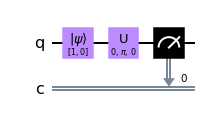

In [3]:
qc_pauli_z().draw(output='mpl')

In [ ]:
grader.check("Task 1")

#### Task 2 (2A, 2B, 2C) - Unitary Inverse Puzzles

We'll study the idea of [uncomputation](https://qiskit.org/textbook/ch-algorithms/grover.html#5.2-Uncomputing,-and-Completing-the-Oracle) during our discussion of quantum algorithms. In general, we may find it helpful to return a qubit to its initial state. 

This process is typically straightforward due to the properties of unitary gates. However, your task is to do so using only a single U gate. Complete the partial circuits below such that the measurements will yield a state equivalent to `initial_state` *up to a global phase*.

#### Task 2A

In [7]:
def reverse_a(initial_state=[1,0]):
    qc = QuantumCircuit(1,1)
    qc.initialize(initial_state)
    qc.x(0)
    qc.h(0)
    qc.y(0)
    qc.x(0)
    qc.z(0)
    qc.barrier()
    
   # BEGIN SOLUTION
    # Can use commutation relation XY = iZ to reduce
    # Find parameters for U(?,?,?) = XH
    theta = 3*np.pi/2
    phi = np.pi
    lamda = np.pi
    qc.u(theta, phi, lamda, 0)
   # END SOLUTION

    qc.barrier()
    qc.measure(0,0)
    return qc

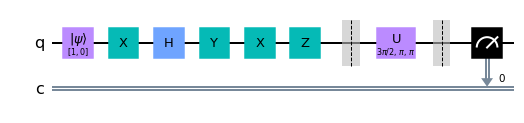

In [8]:
reverse_a().draw(output='mpl')

In [ ]:
grader.check("Task 2A")

#### Task 2B

In [12]:
def reverse_b(initial_state=[1,0]):
    qc = QuantumCircuit(1,1)
    qc.initialize(initial_state)
    for i in range(5):
        qc.x(0)
        qc.y(0)
        qc.z(0)
        qc.h(0)
    qc.barrier()
    
    
    # BEGIN SOLUTION
    # Use commutation relation YX = -iZ
    # so that (HZYX)^5=(-iHZZ)^5=(-iH)^5=-iH
    # Hence to measure state within a global we use
    # parameters for the U gate such that U == H
    theta = np.pi/2
    phi = 0
    lamda = np.pi
    qc.u(theta, phi, lamda, 0)
    # END SOLUTION

    qc.barrier()
    qc.measure(0,0)
    return qc

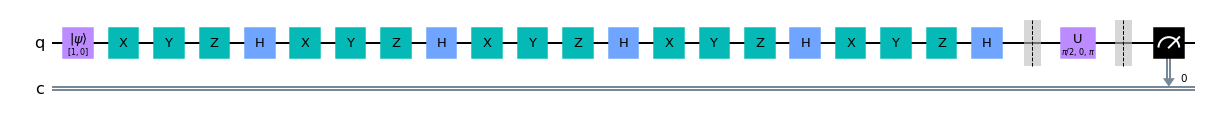

In [13]:
reverse_b().draw(output='mpl')

In [ ]:
grader.check("Task 2B")

#### Task 2C

**Hint**: The P gate generalizes rotation about the Z-axis to an arbitrary angle $\phi$, where
$P(\phi)=\begin{pmatrix} 1 & 0 \\ 0 & e^{i\phi} \end{pmatrix}$

In [17]:
def reverse_c(initial_state=[1,0]):
    qc = QuantumCircuit(1,1)
    qc.initialize(initial_state)
    qc.x(0)
    for i in range(1,6):
        qc.p((-1)**(i)*np.pi/(2**i), 0)
    qc.z(0)
    qc.barrier()
    
    # BEGIN SOLUTION
    # Trick: combine P gates and Z into a single P gate
    # Note that Z == P(pi)
    # Find parameters for U(?,?,?) = (P(-11pi/32)*X)
    theta = np.pi
    phi = np.pi
    lamda = -21*np.pi/32
    qc.u(theta, phi, lamda, 0)
    # END SOLUTION

    qc.barrier()
    qc.measure(0,0)
    return qc

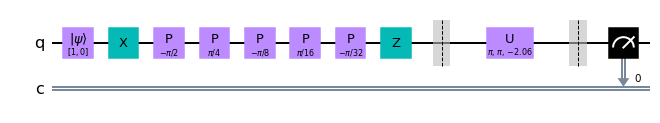

In [18]:
reverse_c().draw(output='mpl')

In [ ]:
grader.check("Task 2C")

<!-- BEGIN QUESTION -->

#### Task 3 (3A, 3B, 3C) - Using Rotation to Obtain Probabilities

#### Task 3A 
Fill in the function below to return `qc_rot_a`, a single-qubit QuantumCircuit satisfying the following conditions:
- it performs a measurement to a single classical bit
- Pr(seeing $|0\rangle$ on measurement) = `0.75`
- your circuit only uses gates from the following list: X, Y, Z, P, H, U

Plot your results using a histogram to verify your solution over `1024` trials.

In [22]:
def qc_rot_a():
    # BEGIN SOLUTION
    # Find wave amplitudes for ket zero and ket one
    # Use amplitudes to determine the proportion of rotation needed 
    qc = QuantumCircuit(1,1)
    theta = np.pi/3
    phi = 0
    lamda = 0
    qc.u(theta, phi, lamda, 0)
    qc.measure(0,0)
    # END SOLUTION
    return qc

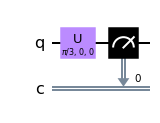

In [23]:
qc_rot_a().draw(output='mpl')

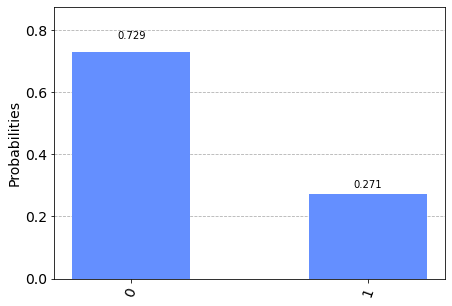

In [24]:
# Plot your results in this cell!

# BEGIN SOLUTION
qc = qc_rot_a()
qasm_sim = BasicAer.get_backend("qasm_simulator")
job = execute(qc, qasm_sim)
counts = job.result().get_counts()
plot_histogram(counts)
# END SOLUTION

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Task 3B - Rotation Operator Gates
Again, fill in the function below to return `qc_rot_b`, a single-qubit QuantumCircuit satisfying the following conditions:
- it performs a measurement to a single classical bit
- Pr(seeing $|0\rangle$ on measurement) = `0.75`
- your circuit only uses gates from the following list: [RX, RY, RZ](https://en.wikipedia.org/wiki/Quantum_logic_gate#Rotation_operator_gates)

Plot your results using a histogram to verify your solution over `1024` trials.

In [25]:
def qc_rot_b():
    # BEGIN SOLUTION
    # Using the provided link, it can be seen that RX(pi) = -iX
    # From this info and part A, we need to use RX(pi/3) to get the desired state
    qc = QuantumCircuit(1,1)
    qc.rx(np.pi/3, 0)
    qc.measure(0,0)
    # END SOLUTION
    return qc

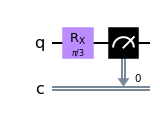

In [26]:
qc_rot_b().draw(output='mpl')

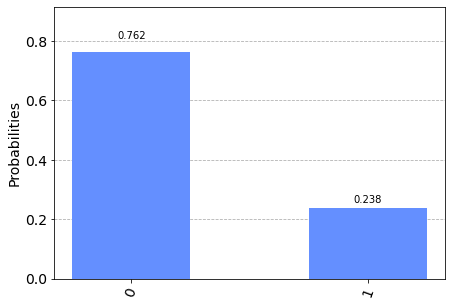

In [27]:
# Plot your results in this cell!

# BEGIN SOLUTION
qasm_sim = BasicAer.get_backend("qasm_simulator")
job = execute(qc_rot_b(), qasm_sim)
counts = job.result().get_counts()
plot_histogram(counts)
# END SOLUTION

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Task 3C
Suppose we apply a Z gate to your circuit from task 3B just before measuring. How will the probability of measuring $|0\rangle$ change from that of the original circuit? Will measurement on the modified circuit yield a state equivalent to the original circuit up to a global phase?

_Type your answer here, replacing this text._

The probability of seeing $|0\rangle$ won't change since Z is just a rotation about the z-axis. However, it's not equivalent up to a global phase since you can't pull out a factor. 

<!-- END QUESTION -->

#### Task 4 - P vs. RZ
In tasks 2C, the P gate was introduced. In lecture and task 3B, you've seen the RZ gate. Both are related to Z-axis rotations, but what utility is there to having each? Is there a mathematical relationship between them? If so, describe it. 

Feel free to use any resources for your research, including `lecture 6: A single qubit`.

_Type your answer here, replacing this text._

<!-- BEGIN QUESTION -->

Source: https://quantum-computing.ibm.com/composer/docs/iqx/operations_glossary#phase-gate

The P gate is equivalent up to a global phase with RZ. The P gate applies a phase to $|1\rangle$ of $e^{i\theta}$. Up to a global phase of $e^{i\theta / 2}$, it is equivalent to $RZ(\theta)$


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Task 5 (5A, 5B) - Transpiling Circuits 
When you submit a job to IBM, the quantum computer will most likely run a different circuit than you built. This is because the quantum computer can only do a very limited set of operations relative to the number of unitary gates. For IBM devices, the transpile step reduces all single-qubit operations to I, X, [SX](https://qiskit.org/documentation/stubs/qiskit.circuit.library.SXGate.html), and RZ ([source](https://qiskit.org/textbook/ch-states/single-qubit-gates.html#7.-The-U-gate--)).

#### Task 5A
Choose one of the IBM backends (see the first assignment for a refresher on this). Use the [transpile](https://qiskit.org/documentation/stubs/qiskit.compiler.transpile.html) method to optimize the given circuit for the backend. Draw the transpiled circuit.

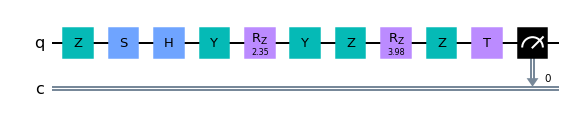

In [28]:
qc_rand = random_circuit(1, 10, measure=True, seed=6)
qc_rand.draw(output='mpl')

ibmq_armonk
ibmq_bogota
ibmq_lima
ibmq_belem
ibmq_quito
ibmq_manila


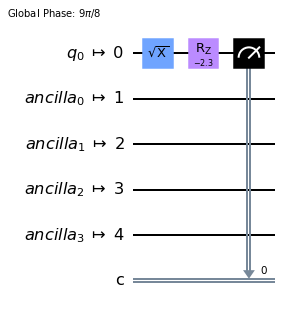

In [29]:
IBMQ.load_account()
# BEGIN SOLUTION
provider = IBMQ.get_provider(hub='ibm-q')
for backend in provider.backends():
    status = backend.status().to_dict()
    if status['operational'] and status['status_msg']=='active':
        if 'simulator' not in status['backend_name']:
            print(status['backend_name'])
            
transpile(qc_rand, provider.get_backend('ibmq_lima')).draw(output='mpl')
# END SOLUTION

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Task 5B
Which gates from {I, X, SX, RZ}, and how many of each, are used in the transpiled circuit?

_Type your answer here, replacing this text._

SX and RZ are used. There is one SX gate used and one RZ gate used. 

<!-- END QUESTION -->

## Conclusion

Next week: the EV bomb!

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)